# Introduction
This notebook aim to improve efficiency and reduce overfitting of Breast Cancer classification by Simple Data Augmentation and Compact CNN Architecture.

# About the Dataset and Method
Each image filename stores information about the image itself: method of procedure biopsy, tumor class, tumor type, patient identification, and magnification factor. For example, SOB_B_TA-14-4659-40-001.png is the image 1, at magnification factor **40X**, of a benign tumor of type tubular adenoma, original from the slide 14-4659, which was collected by procedure SOB.

Using Tensorflow

# Helper

In [1]:
!pip install tensorflow
# !pip install -q -U tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:0000:010:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
model_handle_map = {
    "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/1",
    "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/1",
    "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/1",
    "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/1",
    "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/1",
    "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/1",
    "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/1",
    "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/1",
    "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/1",
    "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
    "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/1",
    "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/1",
    "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/1",
    "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
    "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
    "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
    "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
    "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
    "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
    "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
    "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
    "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
    "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
    "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
    "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
    "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
    "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
    "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
    "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5",
    "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
    "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
    "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
    "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
    "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
    "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
    "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
    "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
    "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
    "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
    "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}


model_image_size_map = {
    "efficientnetv2-s": 384,
    "efficientnetv2-m": 480,
    "efficientnetv2-l": 480,
    "efficientnetv2-s-21k": 384,
    "efficientnetv2-m-21k": 480,
    "efficientnetv2-l-21k": 480,
    "efficientnetv2-s-21k-ft1k": 384,
    "efficientnetv2-m-21k-ft1k": 480,
    "efficientnetv2-l-21k-ft1k": 480,
    "efficientnetv2-b0": 224,
    "efficientnetv2-b1": 240,
    "efficientnetv2-b2": 260,
    "efficientnetv2-b3": 300,
    "efficientnet_b0": 224,
    "efficientnet_b1": 240,
    "efficientnet_b2": 260,
    "efficientnet_b3": 300,
    "efficientnet_b4": 380,
    "efficientnet_b5": 456,
    "efficientnet_b6": 528,
    "efficientnet_b7": 600,
    "inception_v3": 299,
    "inception_resnet_v2": 299,
    "nasnet_large": 331,
    "pnasnet_large": 331,
}

Support function

In [3]:
def plot_count_data(data, col_name, width, height):
    df = pd.DataFrame(data, columns=[col_name])

    # Count the occurrences of each label
    label_counts = df[col_name].value_counts()

    # Plot the counts
    plt.figure(figsize=(width, height))
    plt.bar(label_counts.index, label_counts.values, color=['cyan', 'violet', 'orange', 'green', 'pink', 'grey', 'blue', 'red'])
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title('Counts of '+ col_name +' in the samples')
    plt.xticks(range(len(label_counts)), label_counts.index)
    
    # Rotate the x-axis labels and adjust the layout
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(label_counts)

def view_image():
    pass

def build_compact_network(image_size):
    print('building model...')
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(image_size, image_size, 3)),
        hub.KerasLayer(model_handle, trainable=True, name='base_model'),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid', name='classifier') 
    ],name=model_name)
    model.build((None, image_size, image_size, 3))
    model.summary()
    print('model loaded!!!')
    return model

def decode_test(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, [224, 224])/255
    return img

# Init Notebook

In [4]:
import sys
print(sys.version)
import os

3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


## Import library

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
# from tensorflow.keras.models import model
from tensorflow.keras.layers import Input
# import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import albumentations as A
from functools import partial
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score

import seaborn as sns
import scikitplot as skplt

2024-08-14 09:40:01.067031: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 09:40:01.067196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 09:40:01.211547: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load data

Read the folder

In [6]:
# Define the root directory
root_dir_benign = '/kaggle/input/breakhis-v1-4gb/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB'
root_dir_malignant = '/kaggle/input/breakhis-v1-4gb/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB'

# Initialize empty lists for data
tumor_list = []
magnify_list = []
group_list = []
filename_list = []
type_list = []

# Traverse the directory structure of benign set
for tumor_type in os.listdir(root_dir_benign):
    tumor_path = os.path.join(root_dir_benign, tumor_type)
    for sob_sub_folder in os.listdir(tumor_path):
        sob_sub_path = os.path.join(tumor_path, sob_sub_folder)
        for magnify_folder in os.listdir(sob_sub_path):
            magnify_path = os.path.join(sob_sub_path, magnify_folder)
            magnify_val = magnify_folder[:-1]
            for filename in os.listdir(magnify_path):
                tumor_list.append(tumor_type)
                magnify_list.append(magnify_val)
                filename_list.append(os.path.join(magnify_path, filename))
                type_list.append('benign')

# Traverse the directory structure of malignant set
for tumor_type in os.listdir(root_dir_malignant):
    tumor_path = os.path.join(root_dir_malignant, tumor_type)
    for sob_sub_folder in os.listdir(tumor_path):
        sob_sub_path = os.path.join(tumor_path, sob_sub_folder)
        for magnify_folder in os.listdir(sob_sub_path):
            magnify_path = os.path.join(sob_sub_path, magnify_folder)
            magnify_val = magnify_folder[:-1]
            for filename in os.listdir(magnify_path):
                tumor_list.append(tumor_type)
                magnify_list.append(magnify_val)
                filename_list.append(os.path.join(magnify_path, filename))
                type_list.append('malignant')
                
# Create a DataFrame
data = pd.DataFrame({
    'fold': 1,
    'type': type_list,
    'tumor': tumor_list,
    'magnify': magnify_list,
    'file_path': filename_list,
    
})

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
# data = pd.read_csv('../input/breakhis-v1-4gb/Folds.csv')
class_names = ['benign', 'malignant']
# magnify_values = ['40','100','200','400']
# data_list = []

# for magnify in magnify_values:
#     filtered_data = data[data['magnify'] == magnify]
#     data_list.append(filtered_data)

#load from CSV File
data['label_int'] = data.type.apply(lambda x: class_names.index(x))
data['filename'] = data.file_path.apply(lambda x: x.split('/')[-1])
data.head(3)
#path = data.filename.apply(lambda x: x.split('/')[3])

,fold,type,tumor,magnify,file_path,label_int,filename
0,1,benign,adenosis,200,/kaggle/input/breakhis-v1-4gb/BreaKHis_v1/Brea...,0,SOB_B_A-14-29960CD-200-012.png
1,1,benign,adenosis,200,/kaggle/input/breakhis-v1-4gb/BreaKHis_v1/Brea...,0,SOB_B_A-14-29960CD-200-009.png
2,1,benign,adenosis,200,/kaggle/input/breakhis-v1-4gb/BreaKHis_v1/Brea...,0,SOB_B_A-14-29960CD-200-006.png


# Visualize Dataset

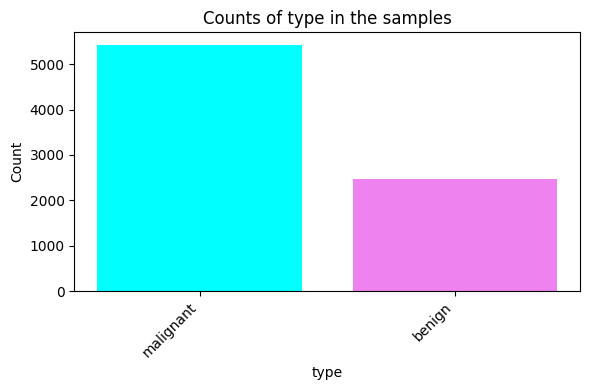

type
malignant    5429
benign       2480
Name: count, dtype: int64


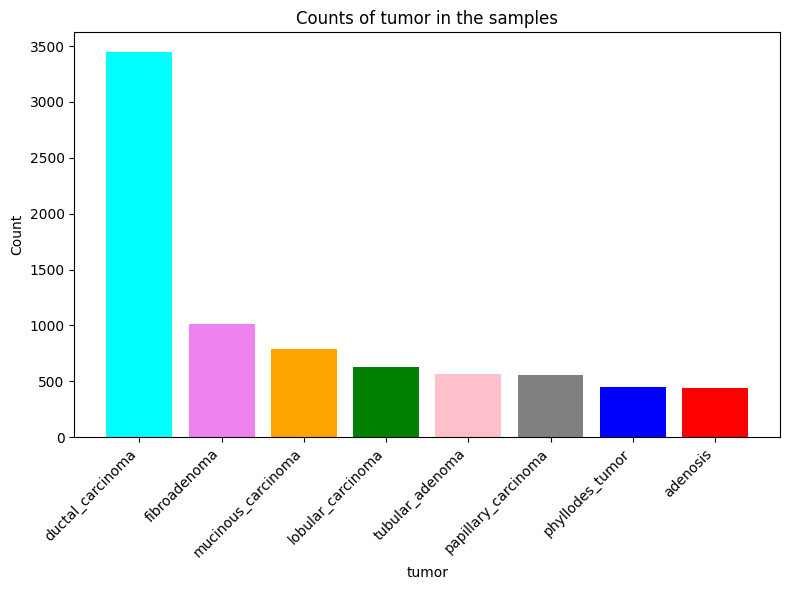

tumor
ductal_carcinoma       3451
fibroadenoma           1014
mucinous_carcinoma      792
lobular_carcinoma       626
tubular_adenoma         569
papillary_carcinoma     560
phyllodes_tumor         453
adenosis                444
Name: count, dtype: int64


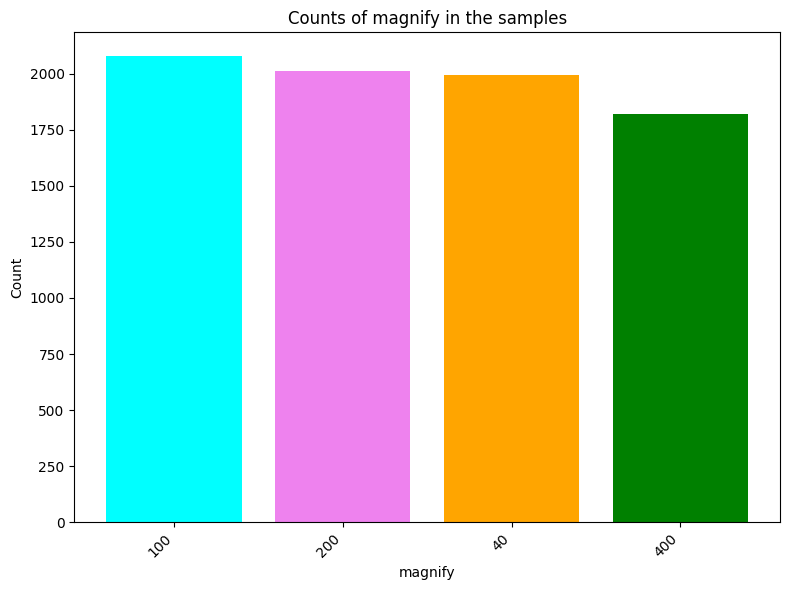

magnify
100    2081
200    2013
40     1995
400    1820
Name: count, dtype: int64


In [8]:
plot_count_data(data, 'type', 6, 4)

plot_count_data(data, 'tumor', 8, 6)

plot_count_data(data, 'magnify', 8, 6)

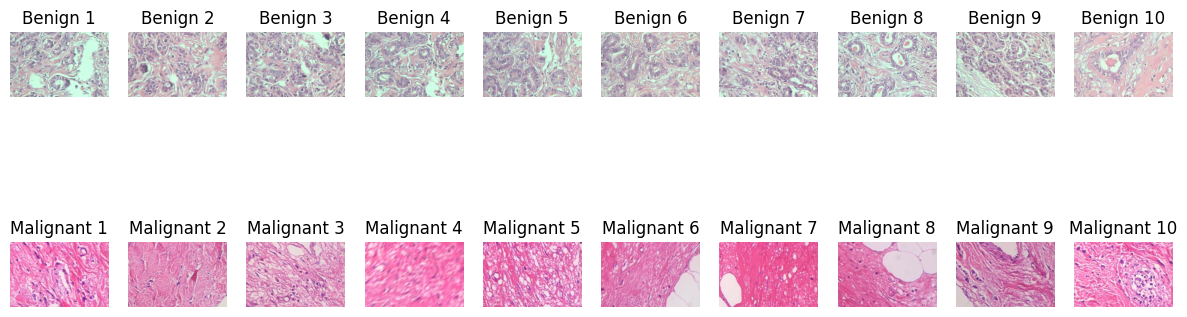

In [9]:
benign_paths = data[data['type'] == 'benign']['file_path'][:10]
malignant_paths = data[data['type'] == 'malignant']['file_path'][:10]


fig, axs = plt.subplots(2, 10, figsize=(15, 5))
for i, path in enumerate(benign_paths):
    img = plt.imread(path)
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title(f'Benign {i+1}')

for i, path in enumerate(malignant_paths):
    img = plt.imread(path)
    axs[1, i].imshow(img)
    axs[1, i].axis('off')
    axs[1, i].set_title(f'Malignant {i+1}')

plt.show()

From non-professional biologist like me Benign looks like Rib Eyes and Malignant looks like Chuck Steak 😂

# Preprocess Data

In [10]:
model_name = 'efficientnetv2-b0'
model_handle = model_handle_map.get(model_name)
IMAGE_SIZE = model_image_size_map.get(model_name, 224)
BATCH_SIZE = 64
EPOCHS = 12

print(f"Selected model: {model_name} : {model_handle}")
print(f"Input size {IMAGE_SIZE}")

Selected model: efficientnetv2-b0 : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2
Input size 224


## 1) Train and Val df splitting (Function):
Split Train and Validation set to 80% and 20% of original Traing set accordingly

In [11]:
# magnify_values = ['40','100','200','400']
# data_list = []

# for magnify in magnify_values:
#     filtered_data = data[data['magnify'] == magnify]
#     data_list.append(filtered_data)

In [12]:
def data_split(data):    
    # remove 600 from dataset for testing
    df_train, df_test = train_test_split(data,test_size = 0.2, random_state=42)

    # split training and validation set
    df_val = df_train.sample(frac=0.2)
    df_train = df_train.drop(df_val.index).reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)

    df_test['set'] = 'test'
    df_train['set'] = 'train'
    df_val['set'] = 'valid'
    
    print("-------------------TRAINING-------------------")
    plot_count_data(df_train, 'type', 8, 6)
    print("-------------------VALIDATION-------------------")
    plot_count_data(df_val, 'type', 8, 6)
    print("-------------------TESTING-------------------")
    plot_count_data(df_test, 'type', 8, 6)

    SAMPLE_SIZE = len(df_train) #TODO
    
    return df_train, df_val, df_test

## 2) Data Augmentation on Traing set (Function)

In [13]:
def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

def aug_fn(image): 
    transforms = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(p=0.5, limit=15),
        A.RandomBrightnessContrast(p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.1, 0.1), brightness_by_max=True),
        A.RandomResizedCrop(p=0.8, height=IMAGE_SIZE, width=IMAGE_SIZE, scale=(0.9, 1.1), ratio=(0.05, 1.1), interpolation=0),
        A.Blur(p=0.3, blur_limit=(1, 1)),
    ])
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img, tf.float32)
    aug_img = tf.image.resize(aug_img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return aug_img

def augmentor(image, label):
    aug_img = tf.numpy_function(func=aug_fn, inp=[image], Tout=tf.float32)
    return aug_img, label

## 3) Load Dataset After Augmentation (Function)

In [14]:
def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return img, label


def load_dataset(df_train, df_val):
    train_loader = tf.data.Dataset.from_tensor_slices((df_train.file_path, df_train.label_int))
    valid_loader = tf.data.Dataset.from_tensor_slices((df_val.file_path, df_val.label_int))

    train_ds = (
        train_loader.shuffle(len(df_train))
        .map(parse_image, num_parallel_calls=AUTOTUNE)
        .map(partial(augmentor),num_parallel_calls=AUTOTUNE)
        .batch(BATCH_SIZE)
        .prefetch(AUTOTUNE) 
    )
    valid_ds = (
        valid_loader.shuffle(len(df_val))
        .map(parse_image, num_parallel_calls=AUTOTUNE)
        .map(resize_rescale, num_parallel_calls=AUTOTUNE)
        .batch(BATCH_SIZE)
        .prefetch(AUTOTUNE)
    )
    print('Load successfully')
    return train_ds, valid_ds

# Define (Compact?) Model

In [15]:
tf.keras.backend.clear_session()

print('building model...')
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    hub.KerasLayer(model_handle, trainable=True, name='base_model'),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid', name='classifier') 
],name=model_name)
model.build((None, IMAGE_SIZE, IMAGE_SIZE, 3))
model.summary()
print('model loaded!!!')

building model...
Model: "efficientnetv2-b0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_model (KerasLayer)     (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)              

# Training

## 1) Define Learning Rate Model (Function)

In [16]:
def custom_lr_schedule(epoch, initial_lr=2e-1, maximal_lr=7e-3, step_size=3): #TODO
    cycle = 1 + epoch // (2 * step_size)
    x = abs(epoch / step_size - 2 * cycle + 1)
    lr = initial_lr + (maximal_lr - initial_lr) * max(0, 1 - x)
    return lr

initial_learning_rate = 2e-1
maximal_learning_rate = 7e-3
# step_size = 3 * (SAMPLE_SIZE // BATCH_SIZE)

## 2) Start Training (Function)

In [17]:
def train_model(train_ds, magnify_val):
    checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(f"best_model_{magnify_val}.h5", save_best_only=True)

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ]
    # Default optimizer
    # clr_scheduler = tfa.optimizers.CyclicalLearningRate( 
    #     initial_learning_rate=2e-1,  maximal_learning_rate=7e-3, 
    #     step_size=3*(SAMPLE_SIZE//BATCH_SIZE),  
    #     scale_fn=lambda x: 1 / (2.0 ** (x - 1)), 
    #     scale_mode='cycle'
    # )

    # model.compile(
    #     optimizer=tf.keras.optimizers.SGD(learning_rate=clr_scheduler) , 
    #     loss=tf.keras.losses.BinaryCrossentropy(), 
    #     metrics=METRICS
    # )

    # Custom optimizer

    learningrate_cb = tf.keras.callbacks.LearningRateScheduler(custom_lr_schedule)

    model.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=initial_learning_rate) , 
        loss=tf.keras.losses.BinaryCrossentropy(), 
        metrics=METRICS
    )

    history = model.fit(
        train_ds, 
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        callbacks = [checkpoint_cb, learningrate_cb],
    #     callbacks = [checkpoint_cb],
        validation_data=valid_ds,
    )
    
    return model, history


## 3) View training history (Function)

In [18]:
def view_history(history):
    h = history.history

    accuracy = h['accuracy']
    val_accuracy = h['val_accuracy']

    loss = h['loss']
    val_loss = h['val_loss']

    epochs_range = range(len(h['loss']))

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Evaluating (Function)

In [19]:
def evaluating(df_test):
    df_test = df_test.sample(frac=1).reset_index(drop=True)
    test_ds = tf.data.Dataset.from_tensor_slices(df_test.file_path) 
    test_ds = test_ds.map(decode_test,num_parallel_calls=AUTOTUNE).batch(len(df_test))
    test_img = next(iter(test_ds))
    test_index = df_test.label_int.values
    test_label = df_test['type'].values

    test_pred = model.predict(test_ds)
    pred_index = np.round(test_pred).astype('uint8')
    pred_label = np.array(class_names)[pred_index]

    print(classification_report(test_index, pred_index, target_names=class_names,zero_division=0))
    print('f1_score        :', f1_score(test_index, pred_index, average='micro'))
    print('accuracy_score  :', accuracy_score(test_index, pred_index))

    cm = skplt.metrics.plot_confusion_matrix(test_label, pred_label, figsize=(8, 8), normalize=False)

# Inferencing (Function)

In [20]:
def inferencing():
    prediction_df = pd.DataFrame({'filename':df_test.filename.values,'actual':df_test.label.values, 'prediction': np.squeeze(pred_label),'path':df_test.file_path.values,})
    wrong_df = prediction_df[prediction_df.actual != prediction_df.prediction].reset_index(drop=True)

    #view first 30 prediction
    plt.figure(figsize=(25,8))
    plt.rcParams.update({'font.size': 8})
    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    for i in range(30):
        ax = plt.subplot(3, 10, i + 1)
        shape = str(test_img[i].numpy().shape)
        plt.imshow(test_img[i].numpy())
        plt.title(pred_label[i][0])
        plt.axis("off") 
        plt.tight_layout

# Run with 40x dataset

In [21]:
magnify_val = '40'
filtered_data = data[data['magnify'] == magnify_val]

## Step 1: split to train, val and test

-------------------TRAINING-------------------


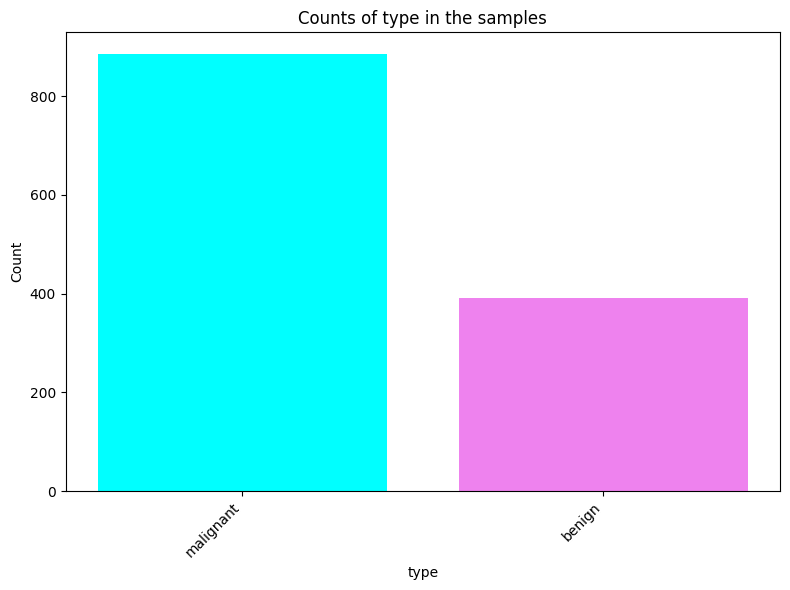

type
malignant    885
benign       392
Name: count, dtype: int64
-------------------VALIDATION-------------------


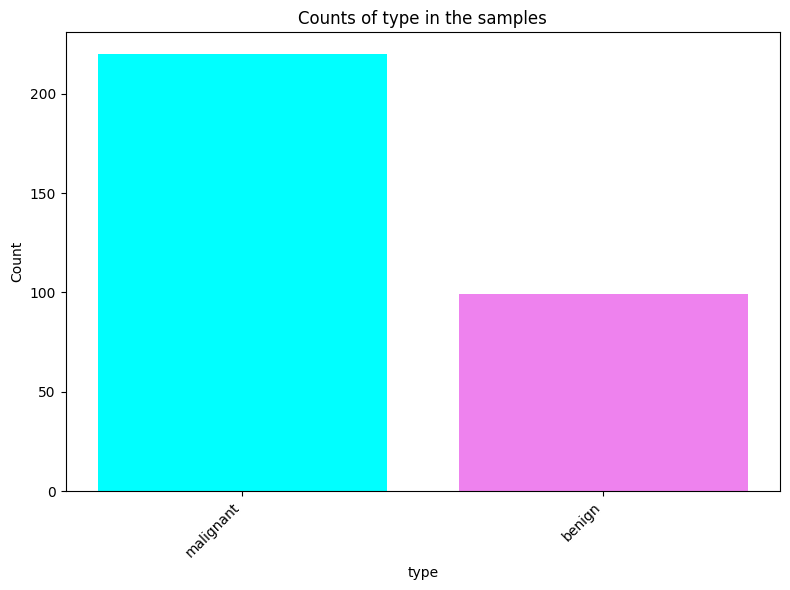

type
malignant    220
benign        99
Name: count, dtype: int64
-------------------TESTING-------------------


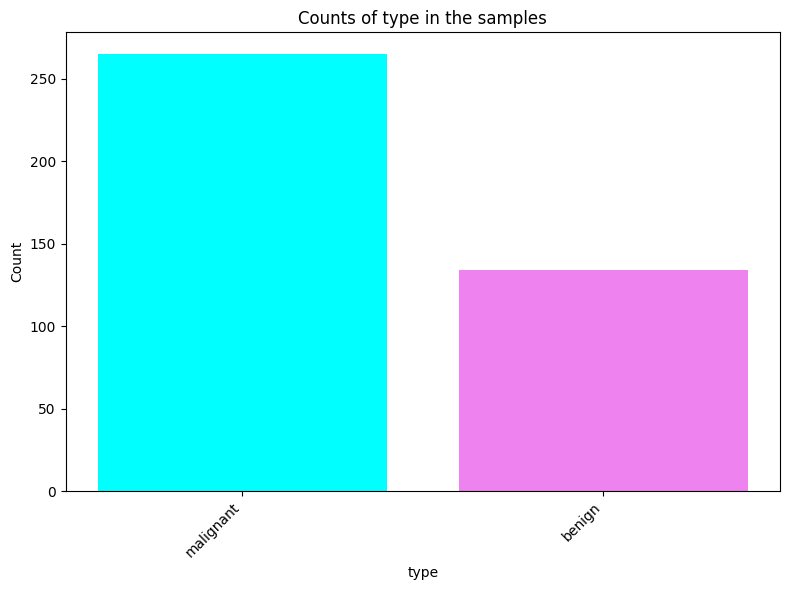

type
malignant    265
benign       134
Name: count, dtype: int64


In [22]:
df_train, df_val, df_test = data_split(filtered_data)

## Step 2: Load Dataset

In [23]:
train_ds, valid_ds = load_dataset(df_train, df_val)

Load successfully


## Step 3: Start Training

In [24]:
model, history = train_model(train_ds, magnify_val)

Epoch 1/12


I0000 00:00:1723628452.725976     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 [==============================] - ETA: 0s - loss: 0.5034 - accuracy: 0.7635 - precision: 0.8612 - recall: 0.7853

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 55s 1s/step - loss: 0.5034 - accuracy: 0.7635 - precision: 0.8612 - recall: 0.7853 - val_loss: 0.5463 - val_accuracy: 0.6991 - val_precision: 0.6962 - val_recall: 1.0000 - lr: 0.2000
Epoch 2/12
20/20 [==============================] - 12s 619ms/step - loss: 0.2585 - accuracy: 0.8990 - precision: 0.9228 - recall: 0.9322 - val_loss: 0.4917 - val_accuracy: 0.7492 - val_precision: 0.7333 - val_recall: 1.0000 - lr: 0.1357
Epoch 3/12
20/20 [==============================] - 13s 633ms/step - loss: 0.1907 - accuracy: 0.9240 - precision: 0.9397 - recall: 0.9514 - val_loss: 0.3254 - val_accuracy: 0.8621 - val_precision: 0.8333 - val_recall: 1.0000 - lr: 0.0499
Epoch 4/12
20/20 [==============================] - 12s 621ms/step - loss: 0.1630 - accuracy: 0.9405 - precision: 0.9509 - recall: 0.9638 - val_loss: 0.2712 - val_accuracy: 0.9091 - val_precision: 0.8898 - val_recall: 0.9909 - lr: 0.0070
Epoch 5/12
20/20 [==============================] - 12s 619ms/

## Step 4: View Training History

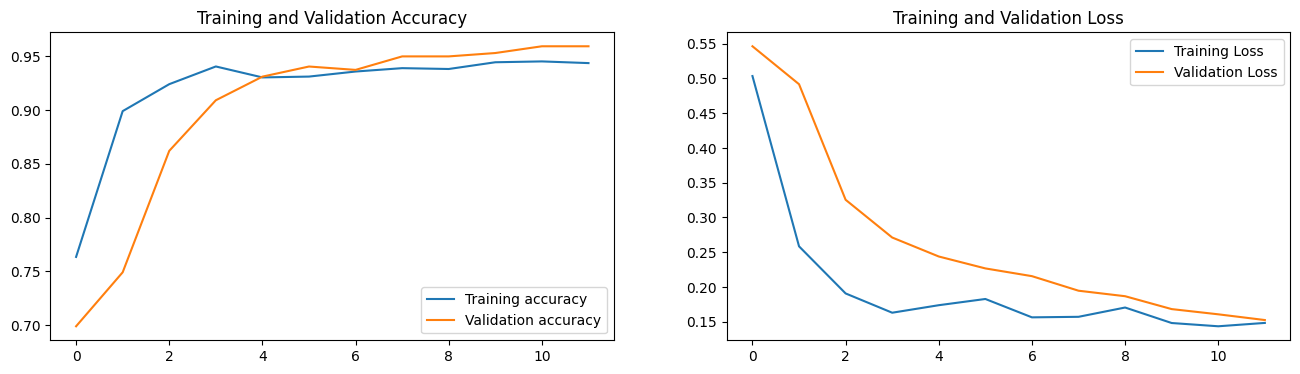

In [25]:
view_history(history)

## Step 5: Evaluating

1/1 [==============================] - 8s 8s/step
              precision    recall  f1-score   support

      benign       0.98      0.88      0.93       134
   malignant       0.94      0.99      0.97       265

    accuracy                           0.95       399
   macro avg       0.96      0.94      0.95       399
weighted avg       0.96      0.95      0.95       399

f1_score        : 0.9548872180451128
accuracy_score  : 0.9548872180451128


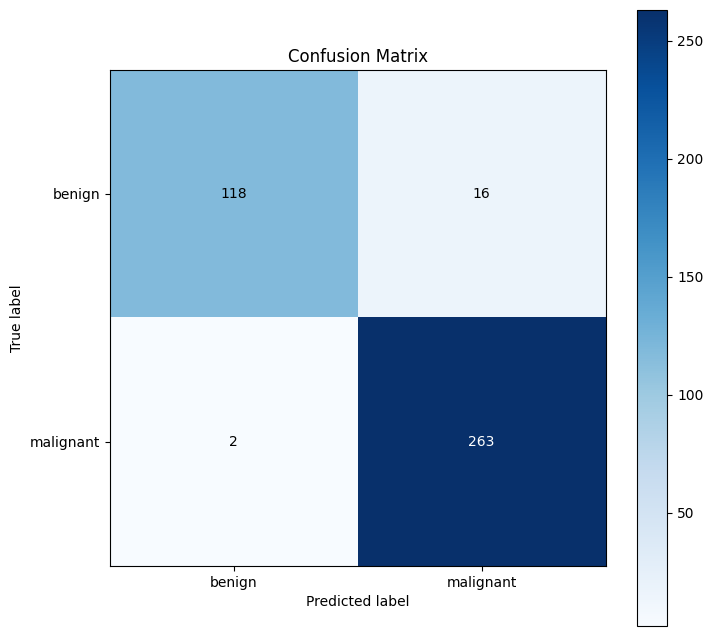

In [26]:
evaluating(df_test)

# Run with 100x data

In [27]:
magnify_val = '100'
filtered_data = data[data['magnify'] == magnify_val]

## Step 1: split to train, val and test

-------------------TRAINING-------------------


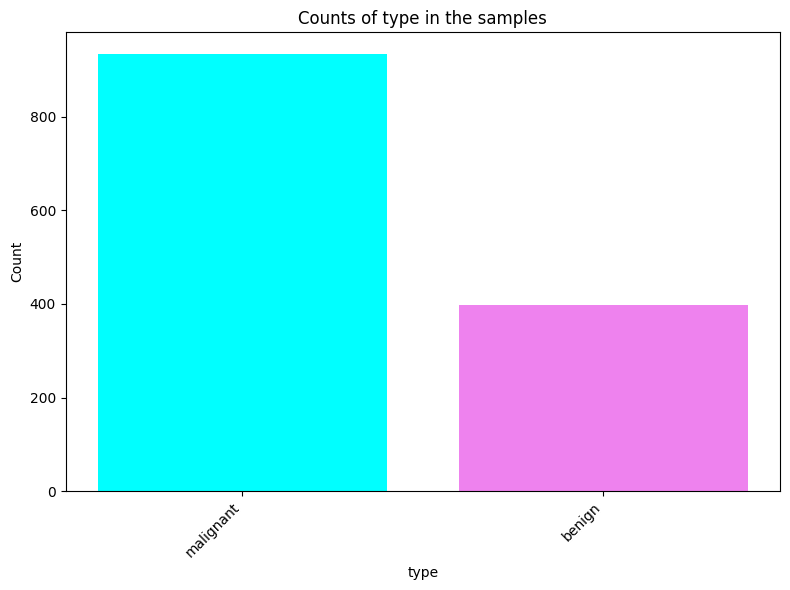

type
malignant    934
benign       397
Name: count, dtype: int64
-------------------VALIDATION-------------------


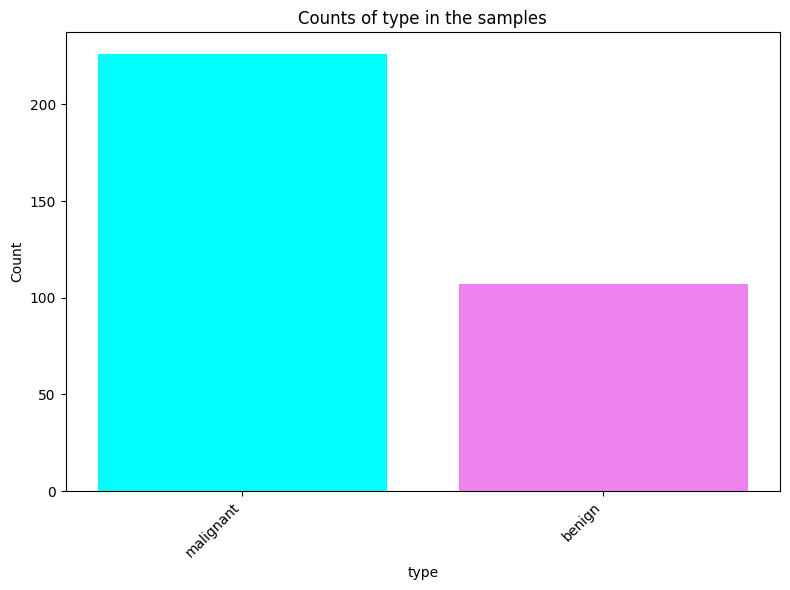

type
malignant    226
benign       107
Name: count, dtype: int64
-------------------TESTING-------------------


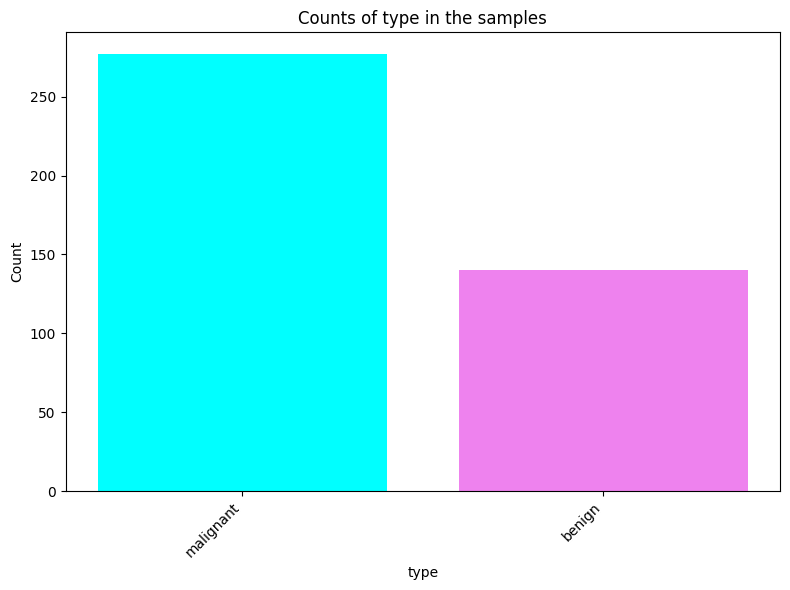

type
malignant    277
benign       140
Name: count, dtype: int64


In [28]:
df_train, df_val, df_test = data_split(filtered_data)

## Step 2: Load Dataset

In [29]:
train_ds, valid_ds = load_dataset(df_train, df_val)

Load successfully


## Step 3: Start Training

In [30]:
model, history = train_model(train_ds, magnify_val)

Epoch 1/12
21/21 [==============================] - ETA: 0s - loss: 0.2951 - accuracy: 0.8866 - precision: 0.9074 - recall: 0.9336

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 39s 966ms/step - loss: 0.2951 - accuracy: 0.8866 - precision: 0.9074 - recall: 0.9336 - val_loss: 0.3505 - val_accuracy: 0.8438 - val_precision: 0.8246 - val_recall: 0.9779 - lr: 0.2000
Epoch 2/12
21/21 [==============================] - 12s 590ms/step - loss: 0.1848 - accuracy: 0.9339 - precision: 0.9500 - recall: 0.9561 - val_loss: 0.5006 - val_accuracy: 0.7808 - val_precision: 0.9693 - val_recall: 0.6991 - lr: 0.1357
Epoch 3/12
21/21 [==============================] - 13s 623ms/step - loss: 0.1491 - accuracy: 0.9444 - precision: 0.9536 - recall: 0.9679 - val_loss: 0.1138 - val_accuracy: 0.9670 - val_precision: 0.9821 - val_recall: 0.9690 - lr: 0.0499
Epoch 4/12
21/21 [==============================] - 13s 611ms/step - loss: 0.1236 - accuracy: 0.9542 - precision: 0.9580 - recall: 0.9775 - val_loss: 0.1032 - val_accuracy: 0.9670 - val_precision: 0.9778 - val_recall: 0.9735 - lr: 0.0070
Epoch 5/12
21/21 [==============================] - 13s 605

## Step 4: View Training History

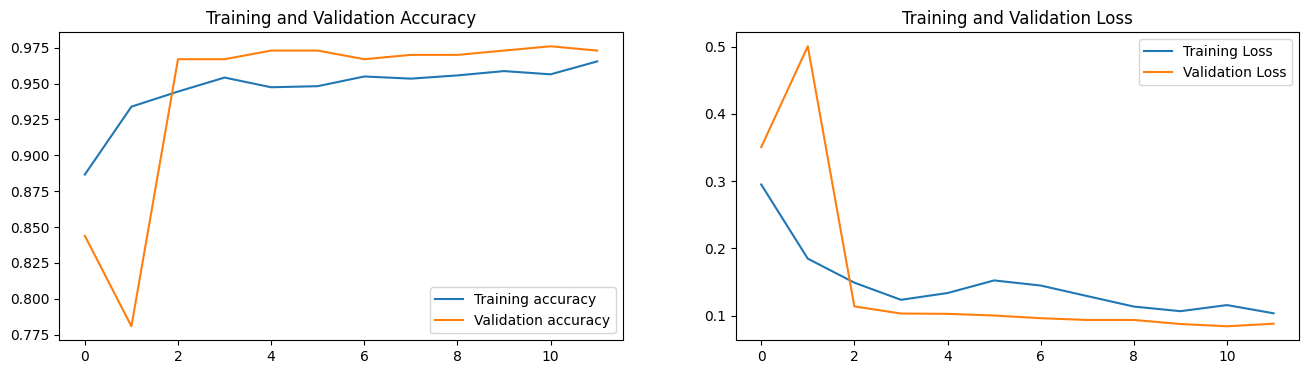

In [31]:
view_history(history)

## Step 5: Evaluating

1/1 [==============================] - 8s 8s/step
              precision    recall  f1-score   support

      benign       0.97      0.96      0.96       140
   malignant       0.98      0.99      0.98       277

    accuracy                           0.98       417
   macro avg       0.97      0.97      0.97       417
weighted avg       0.98      0.98      0.98       417

f1_score        : 0.9760191846522782
accuracy_score  : 0.9760191846522782


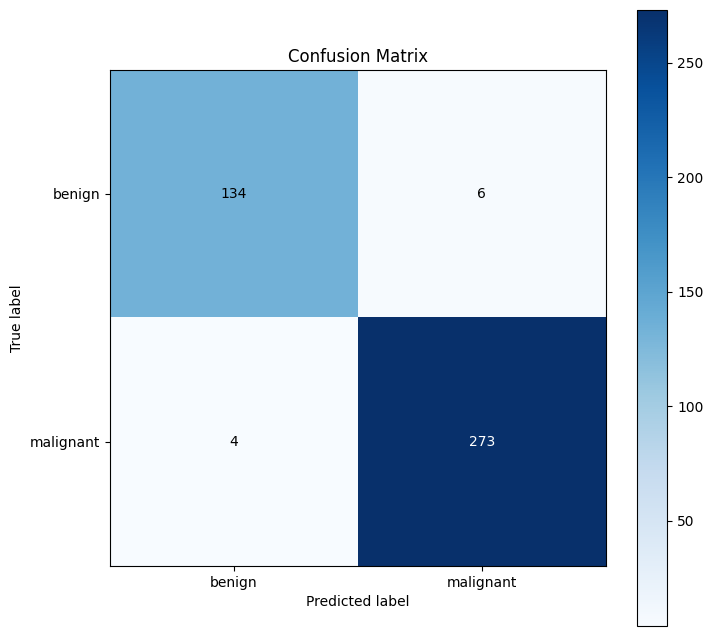

In [32]:
evaluating(df_test)

# Run with 200x data

In [33]:
magnify_val = '200'
filtered_data = data[data['magnify'] == magnify_val]

## Step 1: split to train, val and test

-------------------TRAINING-------------------


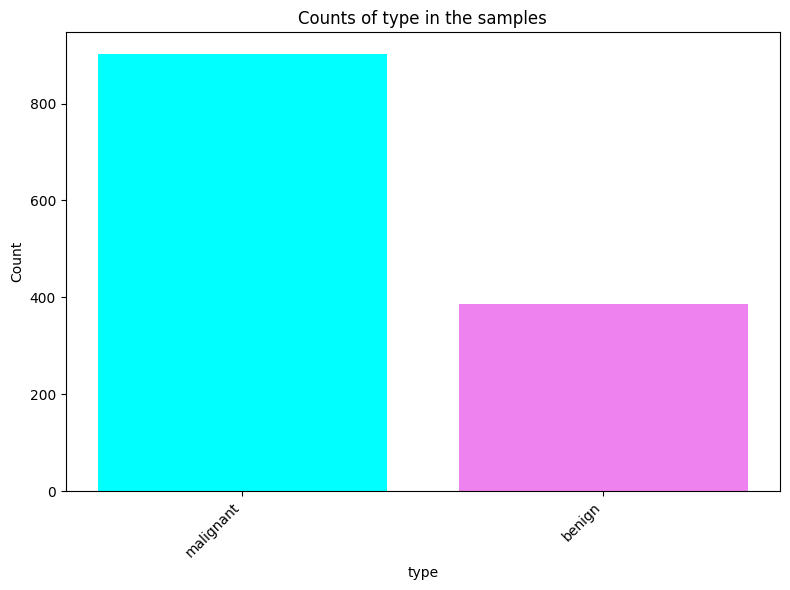

type
malignant    902
benign       386
Name: count, dtype: int64
-------------------VALIDATION-------------------


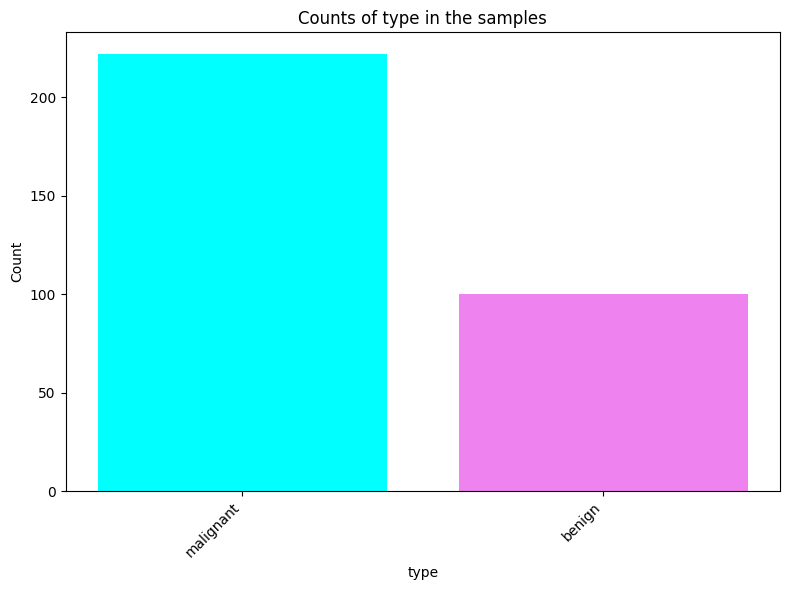

type
malignant    222
benign       100
Name: count, dtype: int64
-------------------TESTING-------------------


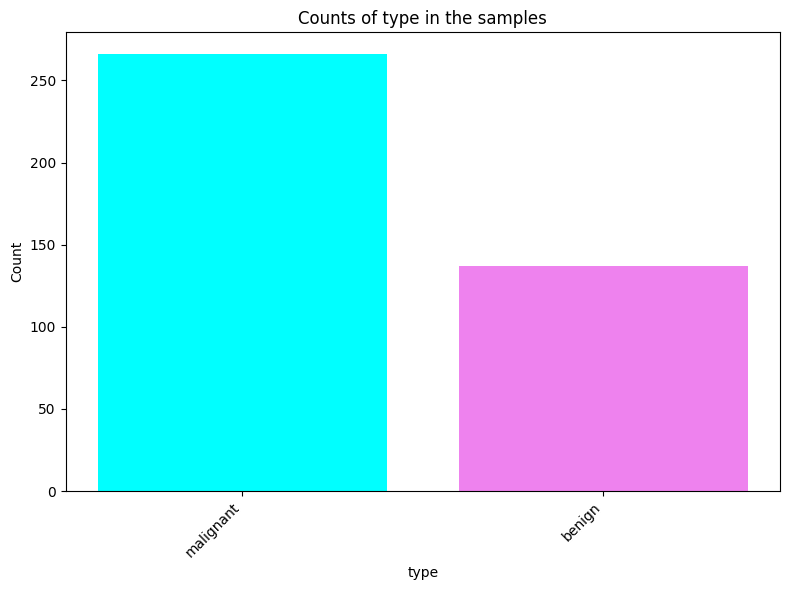

type
malignant    266
benign       137
Name: count, dtype: int64


In [34]:
df_train, df_val, df_test = data_split(filtered_data)

## Step 2: Load Dataset

In [35]:
train_ds, valid_ds = load_dataset(df_train, df_val)

Load successfully


## Step 3: Start Training

In [36]:
model, history = train_model(train_ds, magnify_val)

Epoch 1/12
21/21 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.9053 - precision: 0.9185 - recall: 0.9490

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 35s 808ms/step - loss: 0.2512 - accuracy: 0.9053 - precision: 0.9185 - recall: 0.9490 - val_loss: 0.2715 - val_accuracy: 0.8789 - val_precision: 0.8506 - val_recall: 1.0000 - lr: 0.2000
Epoch 2/12
21/21 [==============================] - 12s 558ms/step - loss: 0.1661 - accuracy: 0.9356 - precision: 0.9505 - recall: 0.9579 - val_loss: 0.6674 - val_accuracy: 0.6801 - val_precision: 0.9103 - val_recall: 0.5946 - lr: 0.1357
Epoch 3/12
21/21 [==============================] - 13s 603ms/step - loss: 0.1540 - accuracy: 0.9410 - precision: 0.9431 - recall: 0.9745 - val_loss: 0.1577 - val_accuracy: 0.9348 - val_precision: 0.9136 - val_recall: 1.0000 - lr: 0.0499
Epoch 4/12
21/21 [==============================] - 12s 583ms/step - loss: 0.1249 - accuracy: 0.9534 - precision: 0.9586 - recall: 0.9756 - val_loss: 0.1094 - val_accuracy: 0.9565 - val_precision: 0.9522 - val_recall: 0.9865 - lr: 0.0070
Epoch 5/12
21/21 [==============================] - 13s 598

## Step 4: View Training History

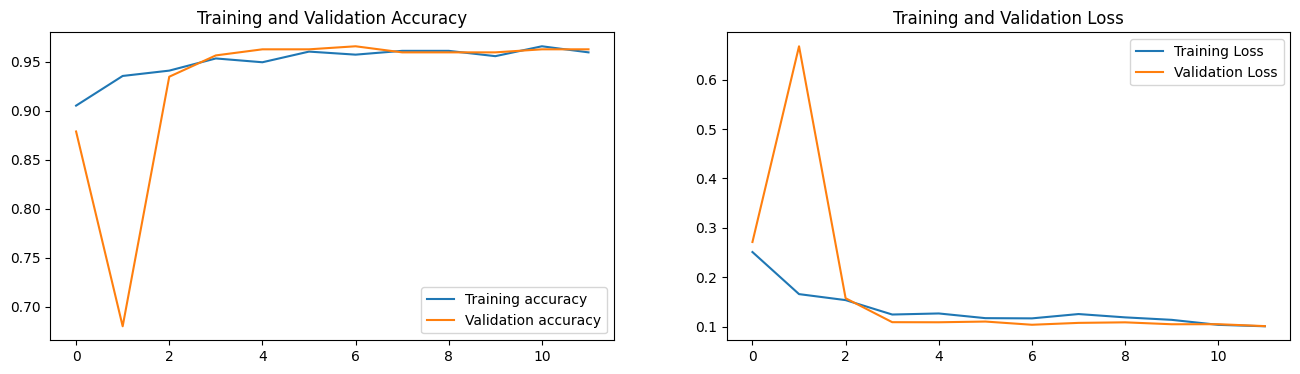

In [37]:
view_history(history)

## Step 5: Evaluating

1/1 [==============================] - 8s 8s/step
              precision    recall  f1-score   support

      benign       0.96      0.98      0.97       137
   malignant       0.99      0.98      0.98       266

    accuracy                           0.98       403
   macro avg       0.98      0.98      0.98       403
weighted avg       0.98      0.98      0.98       403

f1_score        : 0.9801488833746899
accuracy_score  : 0.9801488833746899


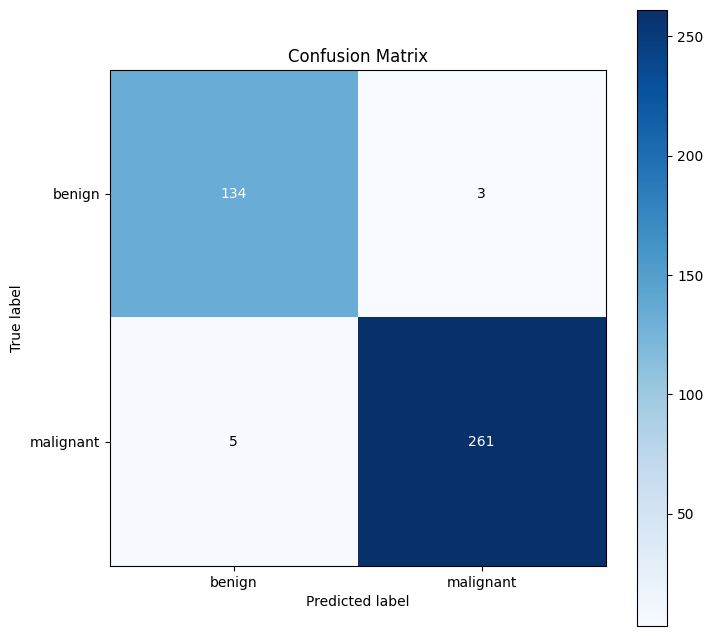

In [38]:
evaluating(df_test)

# Run with 400x dataset

In [39]:
magnify_val = '400'
filtered_data = data[data['magnify'] == magnify_val]

## Step 1: split to train, val and test

-------------------TRAINING-------------------


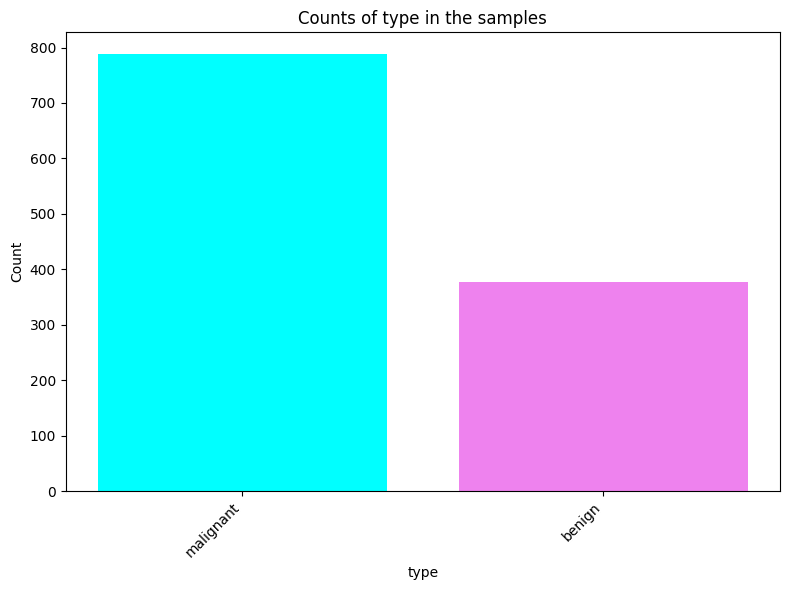

type
malignant    788
benign       377
Name: count, dtype: int64
-------------------VALIDATION-------------------


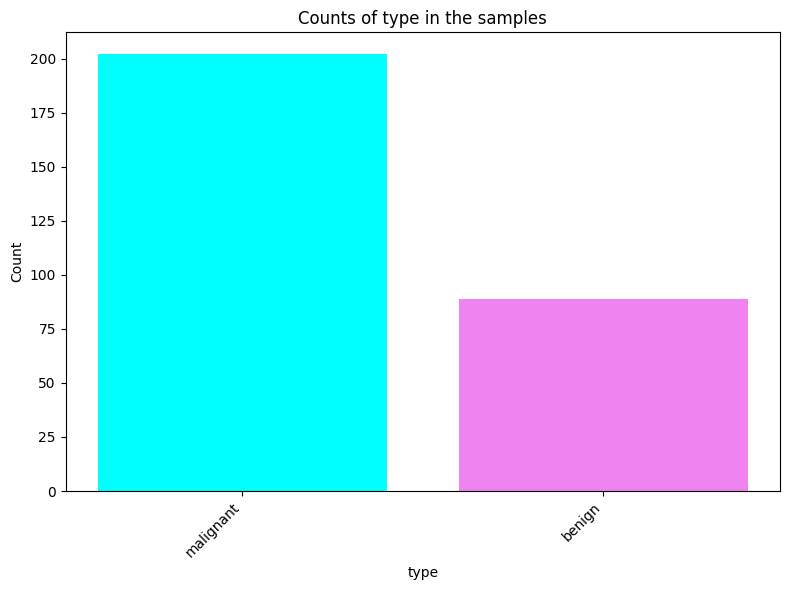

type
malignant    202
benign        89
Name: count, dtype: int64
-------------------TESTING-------------------


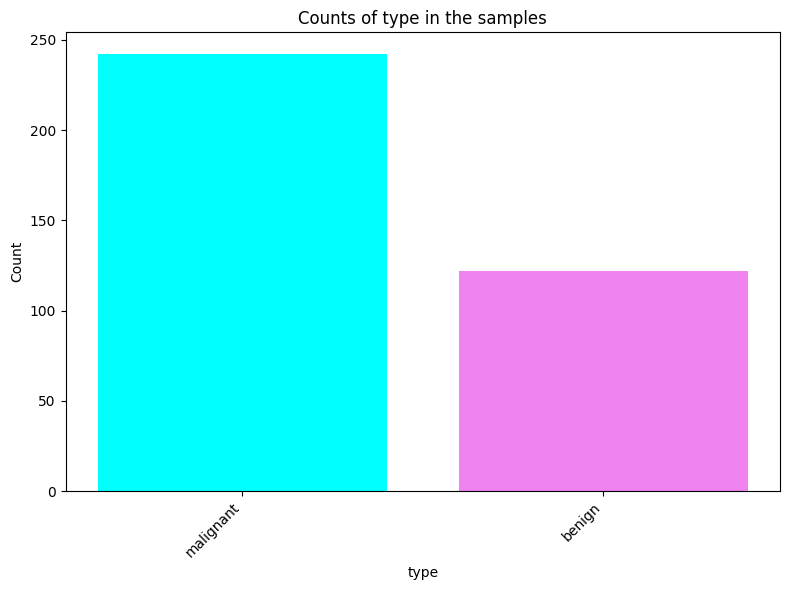

type
malignant    242
benign       122
Name: count, dtype: int64


In [40]:
df_train, df_val, df_test = data_split(filtered_data)

## Step 2: Load Dataset

In [41]:
train_ds, valid_ds = load_dataset(df_train, df_val)

Load successfully


## Step 3: Start Training

In [42]:
model, history = train_model(train_ds, magnify_val)

Epoch 1/12
19/19 [==============================] - ETA: 0s - loss: 0.2723 - accuracy: 0.8901 - precision: 0.9034 - recall: 0.9378

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 34s 802ms/step - loss: 0.2723 - accuracy: 0.8901 - precision: 0.9034 - recall: 0.9378 - val_loss: 0.2779 - val_accuracy: 0.8969 - val_precision: 0.8805 - val_recall: 0.9851 - lr: 0.2000
Epoch 2/12
19/19 [==============================] - 11s 583ms/step - loss: 0.2144 - accuracy: 0.9227 - precision: 0.9235 - recall: 0.9657 - val_loss: 0.1827 - val_accuracy: 0.9450 - val_precision: 0.9387 - val_recall: 0.9851 - lr: 0.1357
Epoch 3/12
19/19 [==============================] - 10s 541ms/step - loss: 0.1678 - accuracy: 0.9330 - precision: 0.9415 - recall: 0.9607 - val_loss: 0.6297 - val_accuracy: 0.6838 - val_precision: 0.8125 - val_recall: 0.7079 - lr: 0.0499
Epoch 4/12
19/19 [==============================] - 11s 561ms/step - loss: 0.2140 - accuracy: 0.9073 - precision: 0.9304 - recall: 0.9327 - val_loss: 0.2068 - val_accuracy: 0.9313 - val_precision: 0.9550 - val_recall: 0.9455 - lr: 0.0070
Epoch 5/12
19/19 [==============================] - 10s 550

## Step 4: View Training History

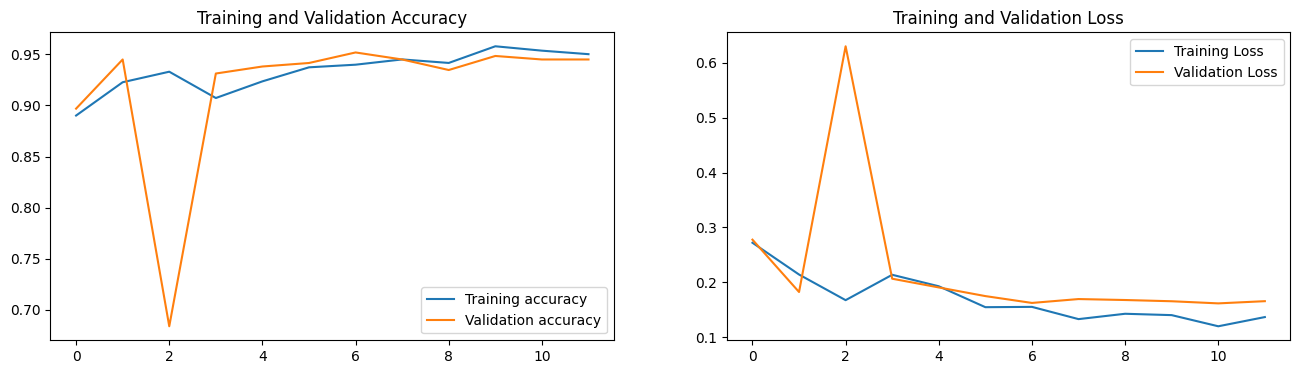

In [43]:
view_history(history)

## Step 5: Evaluating

1/1 [==============================] - 8s 8s/step
              precision    recall  f1-score   support

      benign       0.95      0.98      0.97       122
   malignant       0.99      0.98      0.98       242

    accuracy                           0.98       364
   macro avg       0.97      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364

f1_score        : 0.978021978021978
accuracy_score  : 0.978021978021978


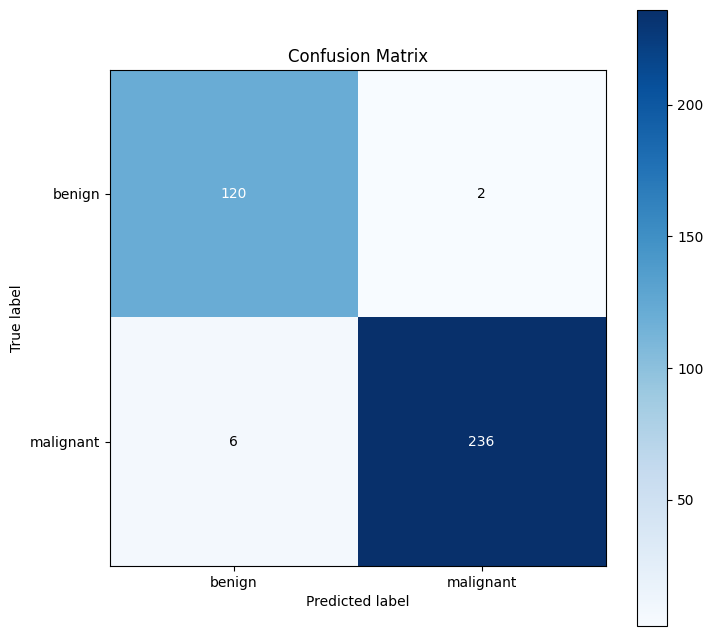

In [44]:
evaluating(df_test)